<a href="https://colab.research.google.com/github/Ishan1923/Skin-Cancer-Detection-using-DL-techniques/blob/main/SkinCancerDetectionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pylab as plt
import os

## REading in Images

In [27]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", dataset_path)

# Construct full path to melanoma test images
melanoma_folder = os.path.join(dataset_path, "Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma")

# Get list of image paths
imgs = glob.glob(os.path.join(melanoma_folder, "*.jpg"))

print(f"Found {len(imgs)} images")

Path to dataset files: /kaggle/input/skin-cancer9-classesisic
Found 16 images


In [37]:
img_mpl = plt.imread(imgs[15])
img_cv2 = cv2.imread(imgs[15])
img_mpl.shape, img_cv2.shape

((1129, 1504, 3), (1129, 1504, 3))

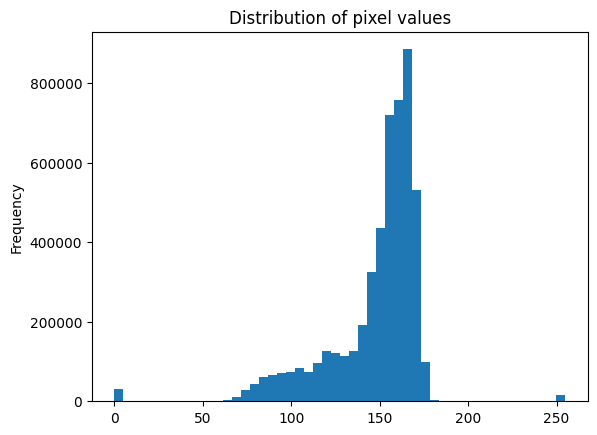

In [42]:
pd.Series(img_mpl.flatten()).plot(kind = 'hist', bins = 50, title = 'Distribution of pixel values')
plt.show()

### Display images


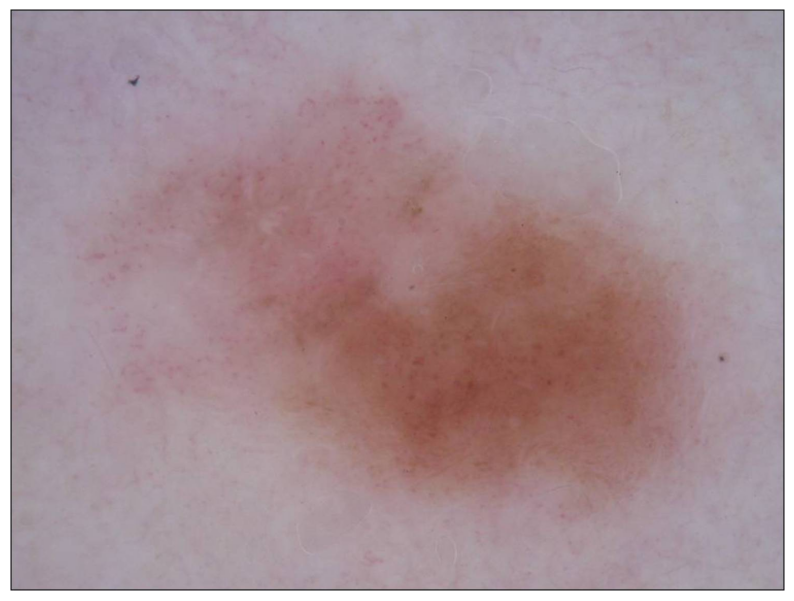

In [47]:
fig, ax = plt.subplots(figsize =(10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

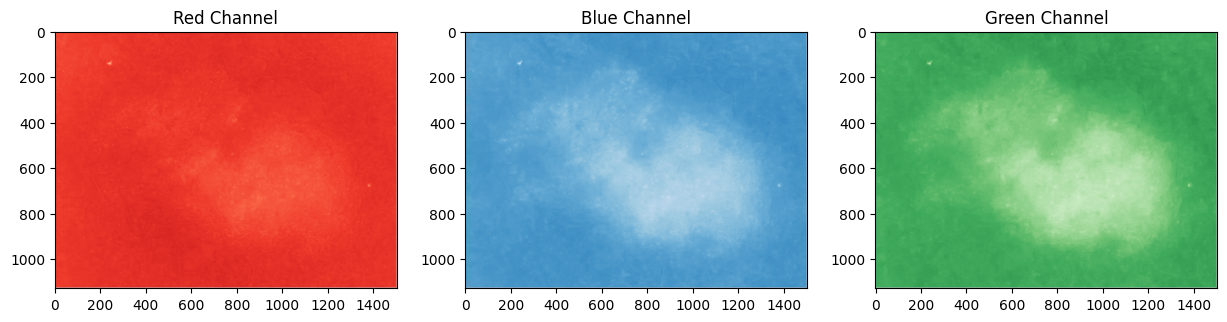

In [52]:
#Display RGB Channels of our image
fig, axe = plt.subplots(1,3, figsize = (15,5))
axe[0].imshow(img_mpl[:,:,0], cmap = 'Reds')
axe[1].imshow(img_mpl[:,:,1], cmap = 'Blues')
axe[2].imshow(img_mpl[:,:,2], cmap = 'Greens')
axe[0].set_title('Red Channel')
axe[1].set_title('Blue Channel')
axe[2].set_title('Green Channel')
plt.show()

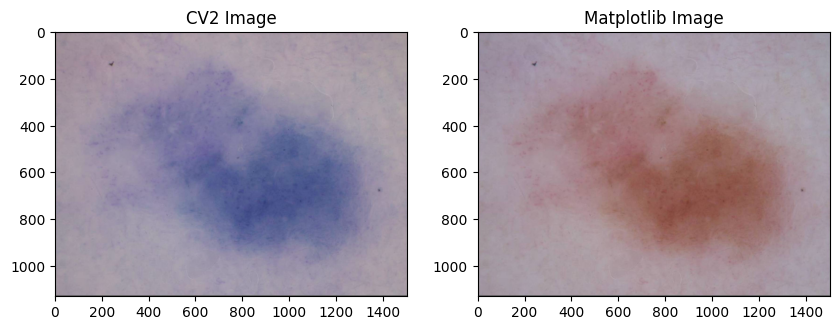

In [58]:
fig, axe = plt.subplots(1,2, figsize = (10, 5))
axe[0].imshow(img_cv2)
axe[1].imshow(img_mpl)
axe[0].set_title('CV2 Image')
axe[1].set_title('Matplotlib Image')
plt.show()

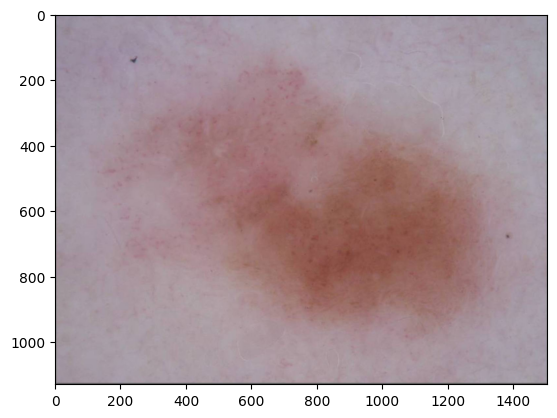

In [59]:
#converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
plt.show()

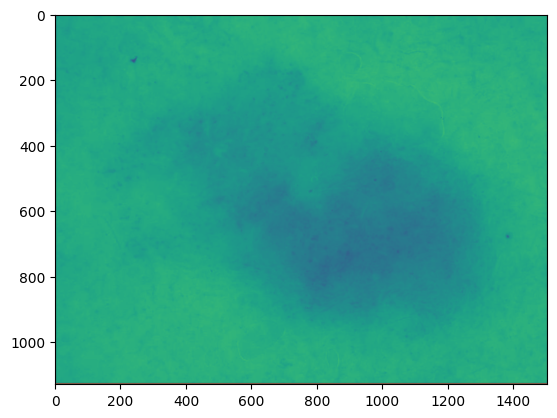

In [60]:
#converting from BGR to Grayscale
img_cv2_gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots()
ax.imshow(img_cv2_gray)
plt.show()

## Image Manipulation

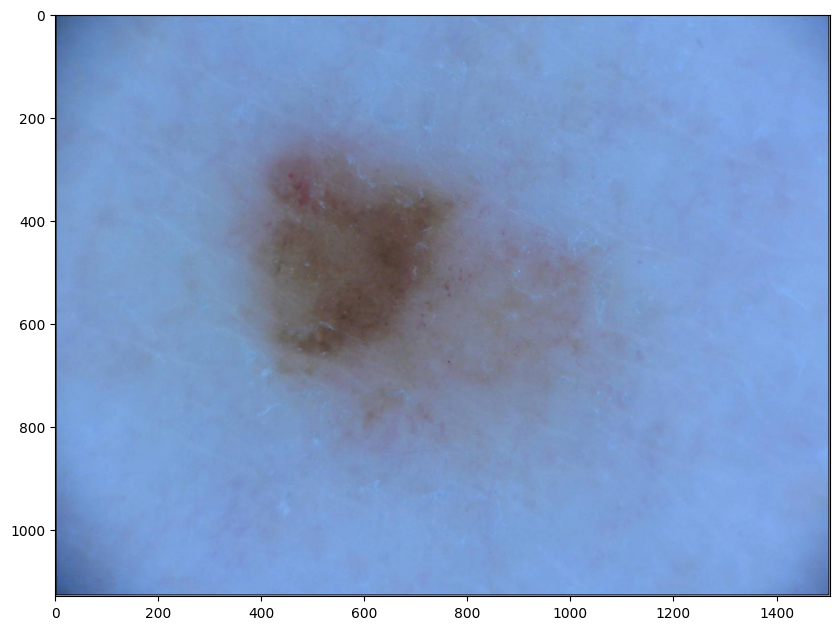

In [65]:
img = plt.imread(imgs[1])
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.axis('on')
plt.show()

### Changing Color Channels

(1129, 1504)


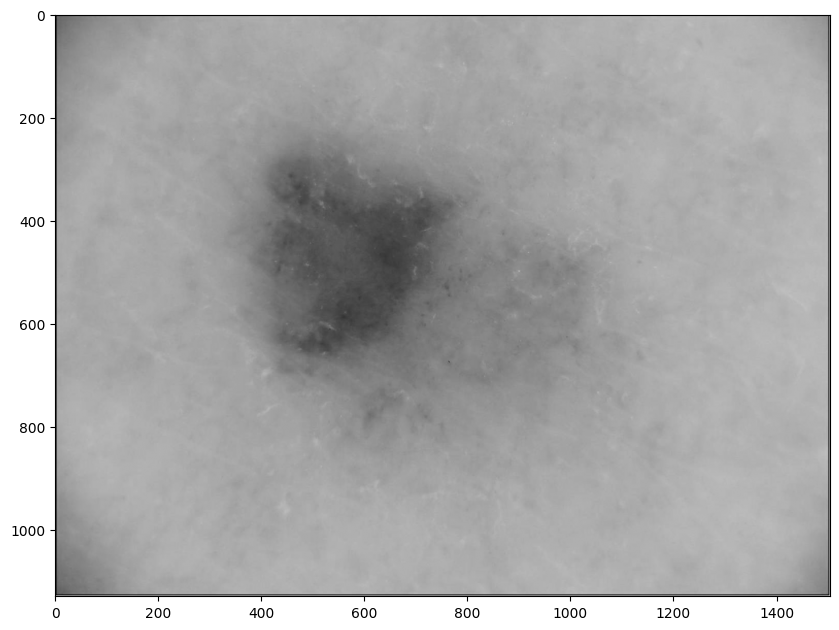

In [71]:
img_bgr_to_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img_bgr_to_gray, cmap = 'gray')
print(img_bgr_to_gray.shape)
plt.show()

### image resizing and scaling

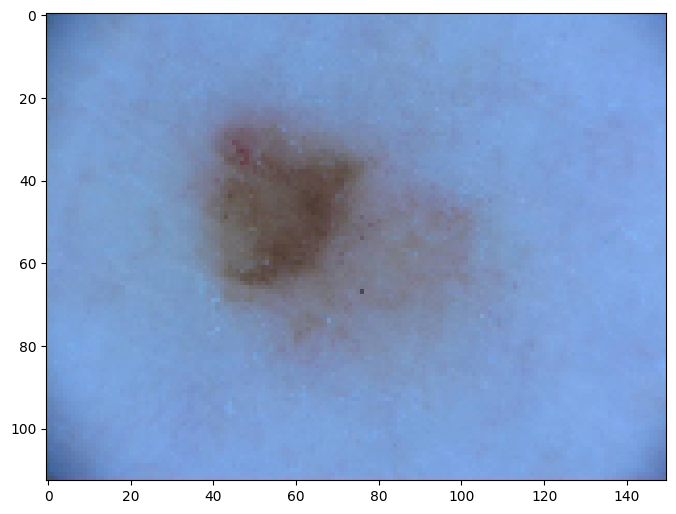

In [69]:
img_resized = cv2.resize(img, None, fx = 0.1, fy = 0.1)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_resized)
plt.show()

# CV2 Kernels

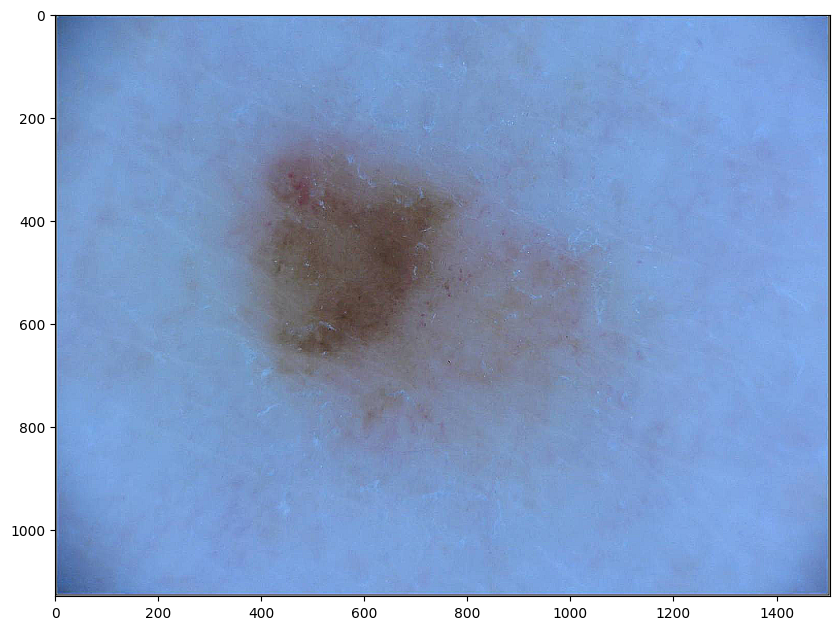

In [77]:
#Sharpen
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1 ,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)


fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(sharpened)